# Project 3 - Housing Price Prediction
## Weston Eckloff, Sana Khan, and Joanna Layton

Overview: We will be using a housing dataset for Ames, Iowa from a Kaggle Competition to predict housing prices. The challenge with this project is that it has been preporcessed with 79 variables/features of a residential home. Using creative feature enigineering in combination with advanced regression our goal is to predict the final price of each home.

# Import Dependencies

In [1]:
from numpy.random import seed
seed(1)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import pandas as pd
from sqlalchemy import create_engine
import psycopg2

# Extract

In [3]:
# Extract CSV
test = "Resources/test.csv"
test_df = pd.read_csv(test)
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
train = "Resources/train.csv"
train_df = pd.read_csv(train)
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Transform

In [5]:
#Drop variables/features that we do not want
cleaned_test_df = test_df.drop(labels=["MSSubClass", "MSZoning", "LotFrontage", "Street", "Alley",
                                "LotShape","LandContour","LandSlope","RoofStyle","MasVnrType","BsmtQual","BsmtCond", 
                                "BsmtExposure","BsmtFinType1","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF",
                                "Heating","HeatingQC","CentralAir","Electrical","1stFlrSF","2ndFlrSF","LowQualFinSF","KitchenAbvGr",
                                "TotRmsAbvGrd","GarageYrBlt","GarageFinish","GarageCars","GarageQual","WoodDeckSF","OpenPorchSF",
                                "EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","PoolQC","Fence","MiscFeature",
                                "MiscVal"],axis=1).copy()
cleaned_test_df.head()

,Id,LotArea,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,...,Fireplaces,FireplaceQu,GarageType,GarageArea,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition
0,1461,11622,AllPub,Inside,NAmes,Feedr,Norm,1Fam,1Story,5,...,0,NaN,Attchd,730.0,TA,Y,6,2010,WD,Normal
1,1462,14267,AllPub,Corner,NAmes,Norm,Norm,1Fam,1Story,6,...,0,NaN,Attchd,312.0,TA,Y,6,2010,WD,Normal
2,1463,13830,AllPub,Inside,Gilbert,Norm,Norm,1Fam,2Story,5,...,1,TA,Attchd,482.0,TA,Y,3,2010,WD,Normal
3,1464,9978,AllPub,Inside,Gilbert,Norm,Norm,1Fam,2Story,6,...,1,Gd,Attchd,470.0,TA,Y,6,2010,WD,Normal
4,1465,5005,AllPub,Inside,StoneBr,Norm,Norm,TwnhsE,1Story,8,...,0,NaN,Attchd,506.0,TA,Y,1,2010,WD,Normal


In [6]:
cleaned_train_df = train_df.drop(labels=["MSSubClass", "MSZoning", "LotFrontage", "Street", "Alley",
                                "LotShape","LandContour","LandSlope","RoofStyle","MasVnrType","BsmtQual","BsmtCond", 
                                "BsmtExposure","BsmtFinType1","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF",
                                "Heating","HeatingQC","CentralAir","Electrical","1stFlrSF","2ndFlrSF","LowQualFinSF","KitchenAbvGr",
                                "TotRmsAbvGrd","GarageYrBlt","GarageFinish","GarageCars","GarageQual","WoodDeckSF","OpenPorchSF",
                                "EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","PoolQC","Fence","MiscFeature",
                                "MiscVal"],axis=1).copy()
cleaned_train_df.head()

,Id,LotArea,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,...,FireplaceQu,GarageType,GarageArea,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,8450,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,...,NaN,Attchd,548,TA,Y,2,2008,WD,Normal,208500
1,2,9600,AllPub,FR2,Veenker,Feedr,Norm,1Fam,1Story,6,...,TA,Attchd,460,TA,Y,5,2007,WD,Normal,181500
2,3,11250,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,...,TA,Attchd,608,TA,Y,9,2008,WD,Normal,223500
3,4,9550,AllPub,Corner,Crawfor,Norm,Norm,1Fam,2Story,7,...,Gd,Detchd,642,TA,Y,2,2006,WD,Abnorml,140000
4,5,14260,AllPub,FR2,NoRidge,Norm,Norm,1Fam,2Story,8,...,TA,Attchd,836,TA,Y,12,2008,WD,Normal,250000


Export cleaned CSVs

In [7]:
cleaned_test_df.to_csv('Resources/cleaned_test.csv', index=False, header=True)

In [8]:
cleaned_train_df.to_csv('Resources/cleaned_trained.csv', index=False, header=True)

Database Connection for Postgres

In [9]:
connection_string = "postgres:sana@localhost:5432/house_prices"
engine = create_engine(f'postgresql://{connection_string}')

# Load

In [10]:
cleaned_test_df.to_sql(name='test', con=engine, if_exists='append', index=True)

In [11]:
cleaned_train_df.to_sql(name='train', con=engine, if_exists='append', index=True)

In [12]:
# Import and Print DataSet
train_data = pd.read_csv('Resources/cleaned_trained.csv')

In [13]:
test_data = pd.read_csv("Resources/cleaned_test.csv")

In [14]:
test_data.head()

,Id,LotArea,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,...,Fireplaces,FireplaceQu,GarageType,GarageArea,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition
0,1461,11622,AllPub,Inside,NAmes,Feedr,Norm,1Fam,1Story,5,...,0,NaN,Attchd,730.0,TA,Y,6,2010,WD,Normal
1,1462,14267,AllPub,Corner,NAmes,Norm,Norm,1Fam,1Story,6,...,0,NaN,Attchd,312.0,TA,Y,6,2010,WD,Normal
2,1463,13830,AllPub,Inside,Gilbert,Norm,Norm,1Fam,2Story,5,...,1,TA,Attchd,482.0,TA,Y,3,2010,WD,Normal
3,1464,9978,AllPub,Inside,Gilbert,Norm,Norm,1Fam,2Story,6,...,1,Gd,Attchd,470.0,TA,Y,6,2010,WD,Normal
4,1465,5005,AllPub,Inside,StoneBr,Norm,Norm,TwnhsE,1Story,8,...,0,NaN,Attchd,506.0,TA,Y,1,2010,WD,Normal


In [15]:
train_data.head()

,Id,LotArea,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,...,FireplaceQu,GarageType,GarageArea,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,8450,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,...,NaN,Attchd,548,TA,Y,2,2008,WD,Normal,208500
1,2,9600,AllPub,FR2,Veenker,Feedr,Norm,1Fam,1Story,6,...,TA,Attchd,460,TA,Y,5,2007,WD,Normal,181500
2,3,11250,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,...,TA,Attchd,608,TA,Y,9,2008,WD,Normal,223500
3,4,9550,AllPub,Corner,Crawfor,Norm,Norm,1Fam,2Story,7,...,Gd,Detchd,642,TA,Y,2,2006,WD,Abnorml,140000
4,5,14260,AllPub,FR2,NoRidge,Norm,Norm,1Fam,2Story,8,...,TA,Attchd,836,TA,Y,12,2008,WD,Normal,250000


In [16]:
# Y
y = train_data['SalePrice']
print(y)

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


In [17]:
columns = train_data.columns
print(columns)

Index(['Id', 'LotArea', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtFinType2',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageArea', 'GarageCond', 'PavedDrive',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')


# Review Cleaned Data

In [18]:
train_data = pd.read_csv("Resources/cleaned_trained.csv")
train_data.describe()

,Id,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,0.613014,472.980137,6.321918,2007.815753,180921.195890
std,421.610009,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.644666,213.804841,2.703626,1.328095,79442.502883
min,1.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,334.500000,5.000000,2007.000000,129975.000000
50%,730.500000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,480.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,576.000000,8.000000,2009.000000,214000.000000
max,1460.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,1418.000000,12.000000,2010.000000,755000.000000


Scatter Plot - Sale Price and Above Ground Living (Square Feet)

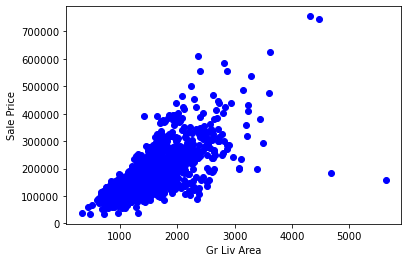

In [19]:
plt.scatter(x=train_data['GrLivArea'], y=train_data['SalePrice'], color="blue");
plt.xlabel("Gr Liv Area"); plt.ylabel("Sale Price");

Violin Plot for Sale Price - Mid $100,000 Sale Price is the Most Common

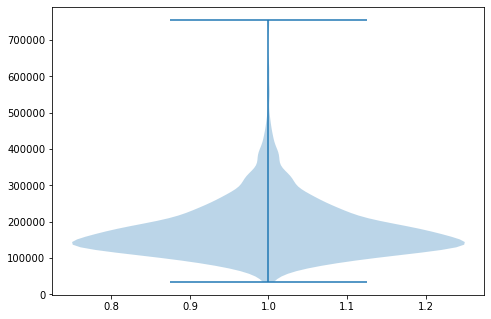

In [20]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bp = ax.violinplot(train_data['SalePrice'])
plt.show()

Box Plot for Outliers - Sales Prices Over $500,000

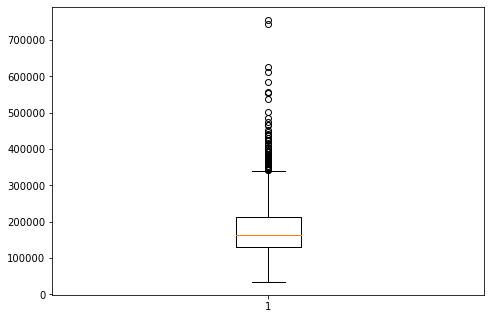

In [21]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bp = ax.boxplot(train_data['SalePrice'])
plt.show()

Heat Map for Variable Correlations

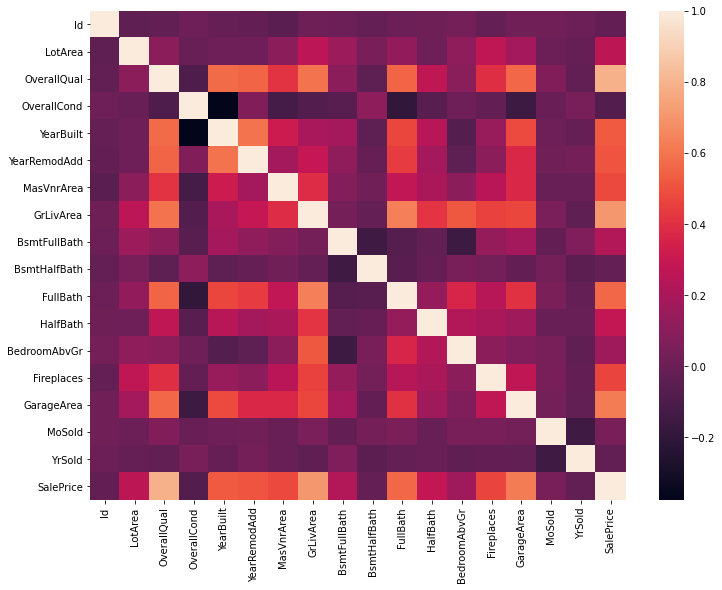

In [22]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(train_data.corr(), ax=ax);

# Random Forest

In [23]:
#Fill Missing Values with Zeroes

names = ["Id","LotArea","Utilities","LotConfig","Neighborhood","Condition1","Condition2","BldgType","HouseStyle","OverallQual",
         "OverallCond", "YearBuilt", "YearRemodAdd", "RoofMatl","Exterior1st","Exterior2nd","MasVnrArea","ExterQual","ExterCond","Foundation","BsmtFinType2","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr",
         "KitchenQual","Functional","Fireplaces","FireplaceQu","GarageType","GarageArea","GarageCond","PavedDrive",
         "MoSold","YrSold","SaleType","SaleCondition"]
X = train_data[names].fillna(0)
X.head()

,Id,LotArea,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,...,Fireplaces,FireplaceQu,GarageType,GarageArea,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition
0,1,8450,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,...,0,0,Attchd,548,TA,Y,2,2008,WD,Normal
1,2,9600,AllPub,FR2,Veenker,Feedr,Norm,1Fam,1Story,6,...,1,TA,Attchd,460,TA,Y,5,2007,WD,Normal
2,3,11250,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,...,1,TA,Attchd,608,TA,Y,9,2008,WD,Normal
3,4,9550,AllPub,Corner,Crawfor,Norm,Norm,1Fam,2Story,7,...,1,Gd,Detchd,642,TA,Y,2,2006,WD,Abnorml
4,5,14260,AllPub,FR2,NoRidge,Norm,Norm,1Fam,2Story,8,...,1,TA,Attchd,836,TA,Y,12,2008,WD,Normal


In [24]:
#Convert strings to Numbers with get_dummies
XX = pd.get_dummies(X)
XX.head()

,Id,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,GrLivArea,BsmtFullBath,BsmtHalfBath,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,8450,7,5,2003,2003,196.0,1710,1,0,...,0,0,0,1,0,0,0,0,1,0
1,2,9600,6,8,1976,1976,0.0,1262,0,1,...,0,0,0,1,0,0,0,0,1,0
2,3,11250,7,5,2001,2002,162.0,1786,1,0,...,0,0,0,1,0,0,0,0,1,0
3,4,9550,7,5,1915,1970,0.0,1717,1,0,...,0,0,0,1,1,0,0,0,0,0
4,5,14260,8,5,2000,2000,350.0,2198,1,0,...,0,0,0,1,0,0,0,0,1,0


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(XX, y)

In [26]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
RandomForestRegModel = RandomForestRegressor()
RandomForestRegModel.fit(X_train,Y_train)

RandomForestRegressor()

In [27]:
Y_test

258     231500
267     179500
288     122000
649      84500
1233    142000
         ...  
1017    187500
534     178000
1334    125000
1369    232000
628     135000
Name: SalePrice, Length: 365, dtype: int64

In [28]:
RandomForestRegModel.score(X_test, Y_test)

0.8634049133095327

In [29]:
feats = []
for feature, importance in zip(XX.columns, RandomForestRegModel.feature_importances_):
    feats.append((importance, feature))

In [30]:
feats.sort(reverse=True)
feats

[(0.5424130224131392, 'OverallQual'),
 (0.1362529797057916, 'GrLivArea'),
 (0.05632550638698815, 'GarageArea'),
 (0.04137157680151296, 'LotArea'),
 (0.027800183540873637, 'YearBuilt'),
 (0.017671532452874898, 'ExterQual_Ex'),
 (0.01596154493416864, 'YearRemodAdd'),
 (0.014985697740738537, 'MasVnrArea'),
 (0.014291210615342395, 'FullBath'),
 (0.011142718064887473, 'MoSold'),
 (0.009857414782475116, 'Id'),
 (0.007619566075366333, 'KitchenQual_Ex'),
 (0.006123349483491794, 'OverallCond'),
 (0.0060022583888110145, 'BsmtFullBath'),
 (0.005031542191514313, 'Fireplaces'),
 (0.004658050580852529, 'YrSold'),
 (0.004273815584920798, 'Neighborhood_NridgHt'),
 (0.004214365771174264, 'GarageType_Detchd'),
 (0.003912875634856672, 'Neighborhood_Edwards'),
 (0.00356466677945275, 'BedroomAbvGr'),
 (0.0035119538884065245, 'Neighborhood_StoneBr'),
 (0.0031372098425492467, 'ExterQual_Gd'),
 (0.0028156230563212746, 'SaleType_WD'),
 (0.002331614748006814, 'KitchenQual_Gd'),
 (0.0020630561498563562, 'HouseSt

In [31]:
df_feats = pd.DataFrame(feats, columns=['Relative Importance','House Features'])
df_feats

,Relative Importance,House Features
0,5.424130e-01,OverallQual
1,1.362530e-01,GrLivArea
2,5.632551e-02,GarageArea
3,4.137158e-02,LotArea
4,2.780018e-02,YearBuilt
...,...,...
183,5.844175e-09,Exterior2nd_CBlock
184,0.000000e+00,RoofMatl_Metal
185,0.000000e+00,Exterior1st_AsphShn
186,0.000000e+00,Condition2_RRAn


In [32]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, Y_train)
y_pred = regressor.predict(X_test)

In [33]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))

Mean Absolute Error: 18865.25684931507


In [34]:
mean = Y_test.mean()
mean

176725.51232876713

In [35]:
metrics = metrics.mean_absolute_error(Y_test, y_pred)/mean
metrics

0.10674891587933005

In [36]:
mean_metrics_df = pd.DataFrame([mean,metrics], columns=[''], index=['Sales Price Mean','Mean (Sales Price Mean/Mean Absolute Error)'])
mean_metrics_df

,
Sales Price Mean,176725.512329
Mean (Sales Price Mean/Mean Absolute Error),0.106749


# K Neighbors

In [37]:
price_bins = pd.cut(Y_train,3,labels=[0,1,2])

In [38]:
print(list(price_bins.values))

[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 

In [39]:
Y_test_bins = pd.cut(Y_test,3,labels=[0,1,2])

In [40]:
print(list(Y_test_bins.values))

[0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 

k: 1, Train/Test Score: 1.000/0.901
k: 2, Train/Test Score: 0.942/0.918
k: 3, Train/Test Score: 0.946/0.915
k: 4, Train/Test Score: 0.932/0.918
k: 5, Train/Test Score: 0.934/0.921
k: 6, Train/Test Score: 0.928/0.915
k: 7, Train/Test Score: 0.932/0.921
k: 8, Train/Test Score: 0.925/0.915
k: 9, Train/Test Score: 0.927/0.926
k: 10, Train/Test Score: 0.921/0.918
k: 11, Train/Test Score: 0.918/0.923
k: 12, Train/Test Score: 0.920/0.915
k: 13, Train/Test Score: 0.920/0.923
k: 14, Train/Test Score: 0.914/0.923
k: 15, Train/Test Score: 0.914/0.923
k: 16, Train/Test Score: 0.908/0.921
k: 17, Train/Test Score: 0.911/0.921
k: 18, Train/Test Score: 0.910/0.921
k: 19, Train/Test Score: 0.911/0.921


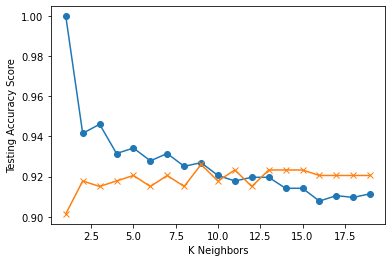

In [41]:
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, price_bins)
    train_score = knn.score(X_train, price_bins)
    test_score = knn.score(X_test, Y_test_bins)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20), train_scores, marker='o')
plt.plot(range(1, 20), test_scores, marker="x")
plt.xlabel("K Neighbors")
plt.ylabel("Testing Accuracy Score")
plt.show()

# Linear Regression

Train Test Split, Identified 11 Variables/Features

In [42]:
# Assign the data to X and y

X = train_data[["LotArea", "OverallCond", "BedroomAbvGr", "YearRemodAdd", "GrLivArea", "Fireplaces", "YearBuilt", "FullBath", "HalfBath", "GarageArea", "OverallQual"]]
y = train_data["SalePrice"].values.reshape(-1, 1)
print(X.shape, y.shape)

(1460, 11) (1460, 1)


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [44]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

Fit the Model - Training Score 77% and Testing Score 80%, Not Too Bad!

In [45]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.7695156899179658
Testing Score: 0.8002134430362952


Scatter Plot of Model with Training and Testing Data

Text(0.5, 1.0, 'Residual Plot')

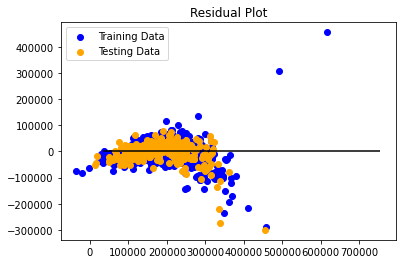

In [46]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [47]:
housing = pd.get_dummies(train_data)
housing.head()

,Id,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,GrLivArea,BsmtFullBath,BsmtHalfBath,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,8450,7,5,2003,2003,196.0,1710,1,0,...,0,0,0,1,0,0,0,0,1,0
1,2,9600,6,8,1976,1976,0.0,1262,0,1,...,0,0,0,1,0,0,0,0,1,0
2,3,11250,7,5,2001,2002,162.0,1786,1,0,...,0,0,0,1,0,0,0,0,1,0
3,4,9550,7,5,1915,1970,0.0,1717,1,0,...,0,0,0,1,1,0,0,0,0,0
4,5,14260,8,5,2000,2000,350.0,2198,1,0,...,0,0,0,1,0,0,0,0,1,0


# Create a StandardScaler Model and Fit it to the Training Data

In [48]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

Transform the Training and Testing Data Using the X_scaler and y_scaler Models

In [49]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [50]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

Scatter Plot with the StandardScaler Moder

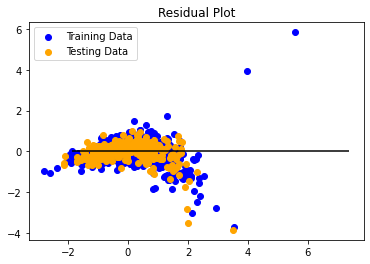

In [51]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

Calculate the MSE and R2 with the Scaled Data

Results:

MSE - 0.23051621910735517,
R2 - 0.8002134430362934

In [52]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.23051621910735523, R2: 0.8002134430362933


Lasso Model

Results:

MSE - 0.2349998630100149, R2 - 0.7963275048518461

In [53]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.2383394813911702, R2: 0.7934330844048709


Ridge Model

Results:

MSE - 0.22811762102677752, R2 - 0.8022922887414417

In [54]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.2305177483088378, R2: 0.8002121176896418


ElasticNet Model

Results: 
    
MSE - 0.23231294221666945, R2 - 0.7986562375380553

In [55]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.23489171291376107, R2: 0.7964212376722501


Normal Neural Network
Loss: 0.3033047616481781, Accuracy: 0.8799999952316284

vs.

Deep Neural Network
Loss: 0.00832375418394804, Accuracy: 1.0

In [56]:
X, y = sklearn.datasets.make_moons(200, noise=0.05)

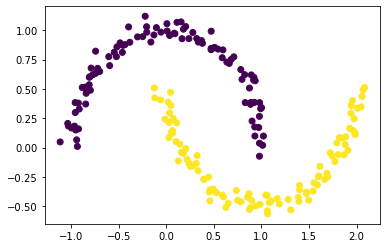

In [57]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [58]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [59]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [60]:
# Transform the training and testing data using the X_scaler

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [61]:
from tensorflow.keras.utils import to_categorical

In [62]:
# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=2))
model.add(Dense(units=2, activation='softmax'))

In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 18        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 14        
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


In [65]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [66]:
# Fit the model to the training data
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
5/5 - 0s - loss: 0.7274 - accuracy: 0.5733
Epoch 2/100
5/5 - 0s - loss: 0.7138 - accuracy: 0.6067
Epoch 3/100
5/5 - 0s - loss: 0.7012 - accuracy: 0.6200
Epoch 4/100
5/5 - 0s - loss: 0.6887 - accuracy: 0.6200
Epoch 5/100
5/5 - 0s - loss: 0.6762 - accuracy: 0.6200
Epoch 6/100
5/5 - 0s - loss: 0.6643 - accuracy: 0.6467
Epoch 7/100
5/5 - 0s - loss: 0.6532 - accuracy: 0.6667
Epoch 8/100
5/5 - 0s - loss: 0.6420 - accuracy: 0.6800
Epoch 9/100
5/5 - 0s - loss: 0.6312 - accuracy: 0.7000
Epoch 10/100
5/5 - 0s - loss: 0.6212 - accuracy: 0.7133
Epoch 11/100
5/5 - 0s - loss: 0.6112 - accuracy: 0.7067
Epoch 12/100
5/5 - 0s - loss: 0.6011 - accuracy: 0.7200
Epoch 13/100
5/5 - 0s - loss: 0.5920 - accuracy: 0.7200
Epoch 14/100
5/5 - 0s - loss: 0.5829 - accuracy: 0.7333
Epoch 15/100
5/5 - 0s - loss: 0.5740 - accuracy: 0.7467
Epoch 16/100
5/5 - 0s - loss: 0.5652 - accuracy: 0.7533
Epoch 17/100
5/5 - 0s - loss: 0.5567 - accuracy: 0.7667
Epoch 18/100
5/5 - 0s - loss: 0.5485 - accuracy: 0.7733
E

In [67]:
deep_model = Sequential()
deep_model.add(Dense(units=6, activation='relu', input_dim=2))
deep_model.add(Dense(units=6, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))

In [68]:
deep_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 6)                 18        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 14        
Total params: 74
Trainable params: 74
Non-trainable params: 0
_________________________________________________________________


In [69]:
deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=1000,
    shuffle=True,
    verbose=2
)

Epoch 1/1000
5/5 - 0s - loss: 0.7273 - accuracy: 0.3933
Epoch 2/1000
5/5 - 0s - loss: 0.7139 - accuracy: 0.3733
Epoch 3/1000
5/5 - 0s - loss: 0.7007 - accuracy: 0.3600
Epoch 4/1000
5/5 - 0s - loss: 0.6892 - accuracy: 0.3667
Epoch 5/1000
5/5 - 0s - loss: 0.6777 - accuracy: 0.3600
Epoch 6/1000
5/5 - 0s - loss: 0.6669 - accuracy: 0.3533
Epoch 7/1000
5/5 - 0s - loss: 0.6568 - accuracy: 0.3733
Epoch 8/1000
5/5 - 0s - loss: 0.6468 - accuracy: 0.3933
Epoch 9/1000
5/5 - 0s - loss: 0.6375 - accuracy: 0.3933
Epoch 10/1000
5/5 - 0s - loss: 0.6289 - accuracy: 0.4000
Epoch 11/1000
5/5 - 0s - loss: 0.6204 - accuracy: 0.4067
Epoch 12/1000
5/5 - 0s - loss: 0.6125 - accuracy: 0.4267
Epoch 13/1000
5/5 - 0s - loss: 0.6046 - accuracy: 0.4533
Epoch 14/1000
5/5 - 0s - loss: 0.5977 - accuracy: 0.4600
Epoch 15/1000
5/5 - 0s - loss: 0.5905 - accuracy: 0.4933
Epoch 16/1000
5/5 - 0s - loss: 0.5844 - accuracy: 0.5067
Epoch 17/1000
5/5 - 0s - loss: 0.5781 - accuracy: 0.5200
Epoch 18/1000
5/5 - 0s - loss: 0.5720 - 

Epoch 145/1000
5/5 - 0s - loss: 0.2438 - accuracy: 0.8933
Epoch 146/1000
5/5 - 0s - loss: 0.2428 - accuracy: 0.8933
Epoch 147/1000
5/5 - 0s - loss: 0.2419 - accuracy: 0.8933
Epoch 148/1000
5/5 - 0s - loss: 0.2407 - accuracy: 0.8933
Epoch 149/1000
5/5 - 0s - loss: 0.2397 - accuracy: 0.8933
Epoch 150/1000
5/5 - 0s - loss: 0.2388 - accuracy: 0.9000
Epoch 151/1000
5/5 - 0s - loss: 0.2376 - accuracy: 0.9000
Epoch 152/1000
5/5 - 0s - loss: 0.2366 - accuracy: 0.9000
Epoch 153/1000
5/5 - 0s - loss: 0.2353 - accuracy: 0.9000
Epoch 154/1000
5/5 - 0s - loss: 0.2343 - accuracy: 0.9000
Epoch 155/1000
5/5 - 0s - loss: 0.2334 - accuracy: 0.8933
Epoch 156/1000
5/5 - 0s - loss: 0.2321 - accuracy: 0.8933
Epoch 157/1000
5/5 - 0s - loss: 0.2310 - accuracy: 0.9000
Epoch 158/1000
5/5 - 0s - loss: 0.2297 - accuracy: 0.9000
Epoch 159/1000
5/5 - 0s - loss: 0.2287 - accuracy: 0.9000
Epoch 160/1000
5/5 - 0s - loss: 0.2277 - accuracy: 0.9067
Epoch 161/1000
5/5 - 0s - loss: 0.2264 - accuracy: 0.9067
Epoch 162/1000

Epoch 287/1000
5/5 - 0s - loss: 0.0607 - accuracy: 0.9933
Epoch 288/1000
5/5 - 0s - loss: 0.0599 - accuracy: 0.9933
Epoch 289/1000
5/5 - 0s - loss: 0.0591 - accuracy: 0.9933
Epoch 290/1000
5/5 - 0s - loss: 0.0584 - accuracy: 0.9933
Epoch 291/1000
5/5 - 0s - loss: 0.0576 - accuracy: 0.9933
Epoch 292/1000
5/5 - 0s - loss: 0.0569 - accuracy: 0.9933
Epoch 293/1000
5/5 - 0s - loss: 0.0562 - accuracy: 0.9933
Epoch 294/1000
5/5 - 0s - loss: 0.0554 - accuracy: 0.9933
Epoch 295/1000
5/5 - 0s - loss: 0.0547 - accuracy: 0.9933
Epoch 296/1000
5/5 - 0s - loss: 0.0541 - accuracy: 0.9933
Epoch 297/1000
5/5 - 0s - loss: 0.0535 - accuracy: 0.9933
Epoch 298/1000
5/5 - 0s - loss: 0.0527 - accuracy: 0.9933
Epoch 299/1000
5/5 - 0s - loss: 0.0521 - accuracy: 0.9933
Epoch 300/1000
5/5 - 0s - loss: 0.0514 - accuracy: 0.9933
Epoch 301/1000
5/5 - 0s - loss: 0.0508 - accuracy: 0.9933
Epoch 302/1000
5/5 - 0s - loss: 0.0502 - accuracy: 0.9933
Epoch 303/1000
5/5 - 0s - loss: 0.0496 - accuracy: 0.9933
Epoch 304/1000

Epoch 429/1000
5/5 - 0s - loss: 0.0139 - accuracy: 1.0000
Epoch 430/1000
5/5 - 0s - loss: 0.0138 - accuracy: 1.0000
Epoch 431/1000
5/5 - 0s - loss: 0.0136 - accuracy: 1.0000
Epoch 432/1000
5/5 - 0s - loss: 0.0135 - accuracy: 1.0000
Epoch 433/1000
5/5 - 0s - loss: 0.0134 - accuracy: 1.0000
Epoch 434/1000
5/5 - 0s - loss: 0.0133 - accuracy: 1.0000
Epoch 435/1000
5/5 - 0s - loss: 0.0132 - accuracy: 1.0000
Epoch 436/1000
5/5 - 0s - loss: 0.0131 - accuracy: 1.0000
Epoch 437/1000
5/5 - 0s - loss: 0.0130 - accuracy: 1.0000
Epoch 438/1000
5/5 - 0s - loss: 0.0129 - accuracy: 1.0000
Epoch 439/1000
5/5 - 0s - loss: 0.0128 - accuracy: 1.0000
Epoch 440/1000
5/5 - 0s - loss: 0.0127 - accuracy: 1.0000
Epoch 441/1000
5/5 - 0s - loss: 0.0126 - accuracy: 1.0000
Epoch 442/1000
5/5 - 0s - loss: 0.0125 - accuracy: 1.0000
Epoch 443/1000
5/5 - 0s - loss: 0.0124 - accuracy: 1.0000
Epoch 444/1000
5/5 - 0s - loss: 0.0123 - accuracy: 1.0000
Epoch 445/1000
5/5 - 0s - loss: 0.0122 - accuracy: 1.0000
Epoch 446/1000

Epoch 571/1000
5/5 - 0s - loss: 0.0052 - accuracy: 1.0000
Epoch 572/1000
5/5 - 0s - loss: 0.0052 - accuracy: 1.0000
Epoch 573/1000
5/5 - 0s - loss: 0.0052 - accuracy: 1.0000
Epoch 574/1000
5/5 - 0s - loss: 0.0051 - accuracy: 1.0000
Epoch 575/1000
5/5 - 0s - loss: 0.0051 - accuracy: 1.0000
Epoch 576/1000
5/5 - 0s - loss: 0.0051 - accuracy: 1.0000
Epoch 577/1000
5/5 - 0s - loss: 0.0051 - accuracy: 1.0000
Epoch 578/1000
5/5 - 0s - loss: 0.0050 - accuracy: 1.0000
Epoch 579/1000
5/5 - 0s - loss: 0.0050 - accuracy: 1.0000
Epoch 580/1000
5/5 - 0s - loss: 0.0050 - accuracy: 1.0000
Epoch 581/1000
5/5 - 0s - loss: 0.0049 - accuracy: 1.0000
Epoch 582/1000
5/5 - 0s - loss: 0.0049 - accuracy: 1.0000
Epoch 583/1000
5/5 - 0s - loss: 0.0049 - accuracy: 1.0000
Epoch 584/1000
5/5 - 0s - loss: 0.0049 - accuracy: 1.0000
Epoch 585/1000
5/5 - 0s - loss: 0.0048 - accuracy: 1.0000
Epoch 586/1000
5/5 - 0s - loss: 0.0048 - accuracy: 1.0000
Epoch 587/1000
5/5 - 0s - loss: 0.0048 - accuracy: 1.0000
Epoch 588/1000

Epoch 713/1000
5/5 - 0s - loss: 0.0025 - accuracy: 1.0000
Epoch 714/1000
5/5 - 0s - loss: 0.0025 - accuracy: 1.0000
Epoch 715/1000
5/5 - 0s - loss: 0.0025 - accuracy: 1.0000
Epoch 716/1000
5/5 - 0s - loss: 0.0025 - accuracy: 1.0000
Epoch 717/1000
5/5 - 0s - loss: 0.0025 - accuracy: 1.0000
Epoch 718/1000
5/5 - 0s - loss: 0.0025 - accuracy: 1.0000
Epoch 719/1000
5/5 - 0s - loss: 0.0024 - accuracy: 1.0000
Epoch 720/1000
5/5 - 0s - loss: 0.0024 - accuracy: 1.0000
Epoch 721/1000
5/5 - 0s - loss: 0.0024 - accuracy: 1.0000
Epoch 722/1000
5/5 - 0s - loss: 0.0024 - accuracy: 1.0000
Epoch 723/1000
5/5 - 0s - loss: 0.0024 - accuracy: 1.0000
Epoch 724/1000
5/5 - 0s - loss: 0.0024 - accuracy: 1.0000
Epoch 725/1000
5/5 - 0s - loss: 0.0024 - accuracy: 1.0000
Epoch 726/1000
5/5 - 0s - loss: 0.0024 - accuracy: 1.0000
Epoch 727/1000
5/5 - 0s - loss: 0.0023 - accuracy: 1.0000
Epoch 728/1000
5/5 - 0s - loss: 0.0023 - accuracy: 1.0000
Epoch 729/1000
5/5 - 0s - loss: 0.0023 - accuracy: 1.0000
Epoch 730/1000

Epoch 855/1000
5/5 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 856/1000
5/5 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 857/1000
5/5 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 858/1000
5/5 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 859/1000
5/5 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 860/1000
5/5 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 861/1000
5/5 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 862/1000
5/5 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 863/1000
5/5 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 864/1000
5/5 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 865/1000
5/5 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 866/1000
5/5 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 867/1000
5/5 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 868/1000
5/5 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 869/1000
5/5 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 870/1000
5/5 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 871/1000
5/5 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 872/1000

Epoch 992/1000
5/5 - 0s - loss: 7.8109e-04 - accuracy: 1.0000
Epoch 993/1000
5/5 - 0s - loss: 7.7838e-04 - accuracy: 1.0000
Epoch 994/1000
5/5 - 0s - loss: 7.7545e-04 - accuracy: 1.0000
Epoch 995/1000
5/5 - 0s - loss: 7.7284e-04 - accuracy: 1.0000
Epoch 996/1000
5/5 - 0s - loss: 7.6947e-04 - accuracy: 1.0000
Epoch 997/1000
5/5 - 0s - loss: 7.6688e-04 - accuracy: 1.0000
Epoch 998/1000
5/5 - 0s - loss: 7.6381e-04 - accuracy: 1.0000
Epoch 999/1000
5/5 - 0s - loss: 7.6115e-04 - accuracy: 1.0000
Epoch 1000/1000
5/5 - 0s - loss: 7.5812e-04 - accuracy: 1.0000


In [70]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

2/2 - 0s - loss: 0.2502 - accuracy: 0.9000
Normal Neural Network - Loss: 0.25021079182624817, Accuracy: 0.8999999761581421


In [71]:
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

2/2 - 0s - loss: 4.6420e-04 - accuracy: 1.0000
Deep Neural Network - Loss: 0.0004641982086468488, Accuracy: 1.0
